<a href="https://colab.research.google.com/github/kOanhNe/-8puzzel-solver/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lưu ý

# Mình sẽ đánh giá essemble của train bằng silhoutte Và đánh giá external giữa independent với actual. Internal chỉ dùng để đánh giá train thôi

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

TARGET_FOLDER = "Project Machine Learning"
BASE_PATH = None

for root, dirs, files in os.walk("/content/drive/MyDrive"):
    if TARGET_FOLDER in dirs:
        BASE_PATH = os.path.join(root, TARGET_FOLDER)
        break

if BASE_PATH is None:
    raise FileNotFoundError(" Không tìm thấy thư mục Project Machine Learning")

print(" Dùng thư mục:", BASE_PATH)
print(" File trong thư mục:", os.listdir(BASE_PATH))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Dùng thư mục: /content/drive/MyDrive/Project Machine Learning
 File trong thư mục: ['actual.csv', 'data_set_ALL_AML_train.csv', 'data_set_ALL_AML_independent.csv', 'train_scaled.csv', 'test_scaled.csv']


# Setup môi trường

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
from sklearn.decomposition import PCA
import joblib
warnings.filterwarnings('ignore')

# Tải dữ liệu

In [3]:
# Train & Independent: gene là index
df_train = pd.read_csv(
    os.path.join(BASE_PATH, "data_set_ALL_AML_train.csv"),
    index_col=0
)

df_test = pd.read_csv(
    os.path.join(BASE_PATH, "data_set_ALL_AML_independent.csv"),
    index_col=0
)

# actual.csv: chỉ chứa nhãn → KHÔNG dùng index_col
df_actual = pd.read_csv(
    os.path.join(BASE_PATH, "actual.csv")
)

print("Train shape:", df_train.shape)
print("Independent shape:", df_test.shape)
print("Actual shape:", df_actual.shape)


Train shape: (7129, 77)
Independent shape: (7129, 69)
Actual shape: (72, 2)


# Tiền Xử Lý Dữ Liệu (Clean + Transpose + Z-score + PCA)

In [4]:
# === CLEAN ===
def clean_gene_expression(df):
    drop_cols = [
        col for col in df.columns
        if "Gene Description" in col
        or "Gene Accession Number" in col
        or "call" in col.lower()
    ]
    df_clean = df.drop(columns=drop_cols, errors='ignore')
    return df_clean

# Clean
df_train_clean = clean_gene_expression(df_train)
df_test_clean  = clean_gene_expression(df_test)

# === TRANSPOSE ===
X_train = df_train_clean.T
X_test  = df_test_clean.T

print("Train shape after transpose:", X_train.shape)
print("Test shape after transpose:", X_test.shape)

# === Z-SCORE NORMALIZATION ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Scaled train shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)

# === PCA ===
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Train PCA shape:", X_train_pca.shape)
print("Test PCA shape:", X_test_pca.shape)
print("Number of PCs kept:", pca.n_components_)

# === PCA → DataFrame ===
pc_cols = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]

X_train_pca_df = pd.DataFrame(
    X_train_pca,
    index=X_train.index,
    columns=pc_cols
)

X_test_pca_df = pd.DataFrame(
    X_test_pca,
    index=X_test.index,
    columns=pc_cols
)

# === SAVE FILE (CHỈ SỬA ĐƯỜNG DẪN) ===
X_train_out = X_train_pca_df.copy()
X_train_out.insert(0, "Sample_ID", X_train_out.index)
X_train_out.to_csv(
    os.path.join(BASE_PATH, "train_scaled.csv"),
    index=False
)

X_test_out = X_test_pca_df.copy()
X_test_out.insert(0, "Sample_ID", X_test_out.index)
X_test_out.to_csv(
    os.path.join(BASE_PATH, "test_scaled.csv"),
    index=False
)


Train shape after transpose: (38, 7129)
Test shape after transpose: (34, 7129)
Scaled train shape: (38, 7129)
Scaled test shape: (34, 7129)
Train PCA shape: (38, 32)
Test PCA shape: (34, 32)
Number of PCs kept: 32


# BASE MODELS - K-MEANS++

# BASE MODELS - HIERARCHICAL

# **Xây dựng mô hình (Training) và đánh giá nội bộ (chưa đụng đến tập Test hay so sánh với thực tế)**

 Đã tải dữ liệu Train từ: /content/drive/MyDrive/Project Machine Learning/train_scaled.csv
 Kích thước dữ liệu Train: (38, 32)
 BẮT ĐẦU QUÁ TRÌNH HUẤN LUYỆN & ĐÁNH GIÁ NỘI BỘ

 ĐANG HUẤN LUYỆN (Linkage: SINGLE)
   Iter 20: Còn 18 cụm...
   -> Đạt mốc 2 cụm. Lưu nhãn...
 Hoàn tất dựng cây phân cấp!
   => SINGLE: Silhouette=0.2811, DB Index=0.5682


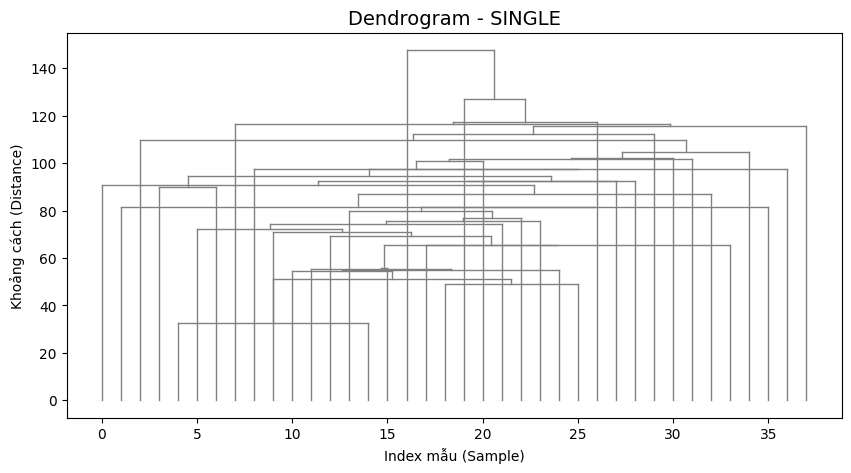


 ĐANG HUẤN LUYỆN (Linkage: AVERAGE)
   Iter 20: Còn 18 cụm...
   -> Đạt mốc 2 cụm. Lưu nhãn...
 Hoàn tất dựng cây phân cấp!
   => AVERAGE: Silhouette=0.2811, DB Index=0.5682


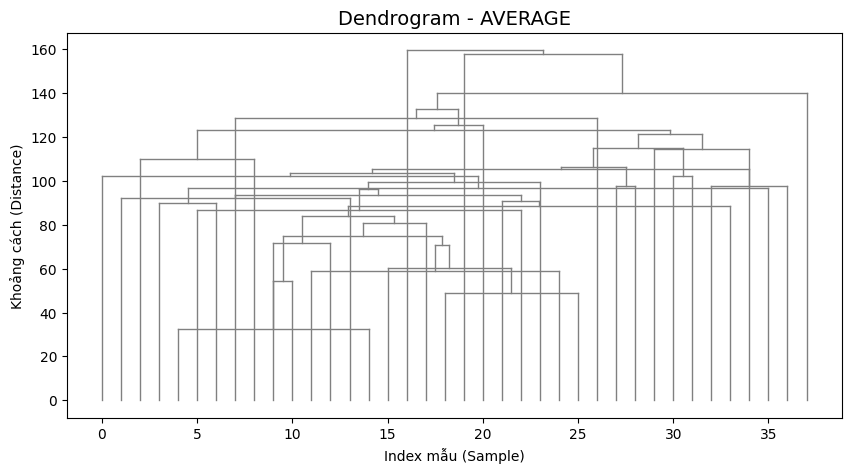


 ĐANG HUẤN LUYỆN (Linkage: COMPLETE)
   Iter 20: Còn 18 cụm...
   -> Đạt mốc 2 cụm. Lưu nhãn...
 Hoàn tất dựng cây phân cấp!
   => COMPLETE: Silhouette=0.2846, DB Index=1.4111


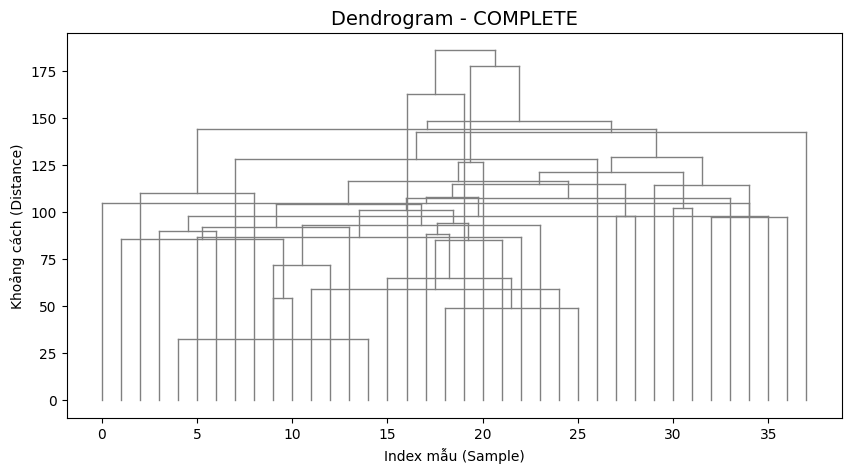


 ĐANG HUẤN LUYỆN (Linkage: WARD)
   Iter 20: Còn 18 cụm...
   -> Đạt mốc 2 cụm. Lưu nhãn...
 Hoàn tất dựng cây phân cấp!
   => WARD: Silhouette=0.0977, DB Index=2.6957


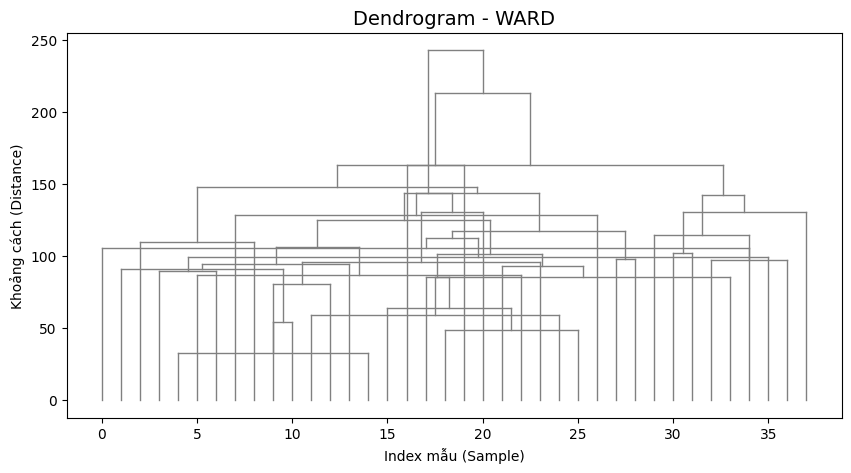


 BẢNG TỔNG HỢP (INTERNAL METRICS)
          Silhouette  DB_Index
single      0.281052  0.568246
average     0.281052  0.568246
complete    0.284613  1.411134
ward        0.097708  2.695706


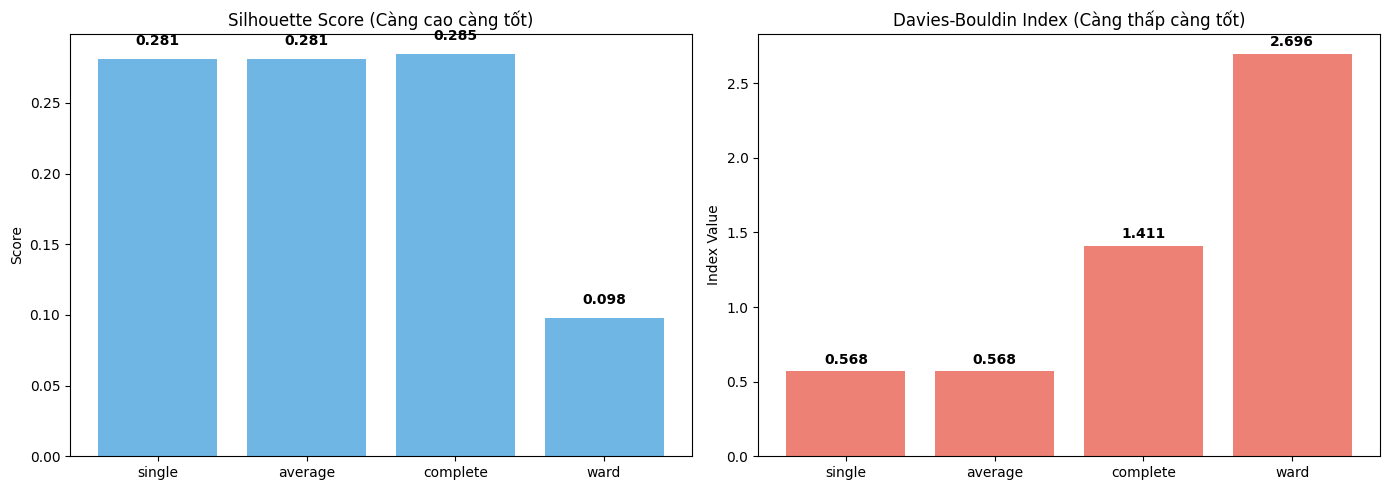


 KHUYẾN NGHỊ (Dựa trên cấu trúc dữ liệu):
   Phương pháp 'COMPLETE' cho điểm Silhouette cao nhất.
   (Lưu ý: Nếu dữ liệu có nhiễu, Silhouette cao có thể do tách outlier, cần kiểm tra kỹ Dendrogram).


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
import os

# ============================================================
# PHẦN 1: CLASS HIERARCHICAL CLUSTERING (CHỈ TRAIN)
# ============================================================

class HierarchicalClustering:
    """
    Agglomerative Hierarchical Clustering - Tự code từ đầu.
    Hỗ trợ: Single, Complete, Average, Ward.
    Tập trung vào Fit và vẽ Dendrogram.
    """

    def __init__(self, n_clusters=2, linkage='ward'):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.labels_ = None
        self.centroids_ = None
        self.merge_history_ = []
        self.cluster_coords_ = {}

    def _euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def _compute_distance_matrix(self, X):
        n = X.shape[0]
        dist_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(i+1, n):
                dist = self._euclidean_distance(X[i], X[j])
                dist_matrix[i, j] = dist
                dist_matrix[j, i] = dist
        return dist_matrix

    # --- CÁC HÀM TÍNH KHOẢNG CÁCH (LINKAGE) ---
    def _single_linkage(self, c1_idxs, c2_idxs, dist_matrix):
        min_dist = float('inf')
        for i in c1_idxs:
            for j in c2_idxs:
                if dist_matrix[i, j] < min_dist: min_dist = dist_matrix[i, j]
        return min_dist

    def _complete_linkage(self, c1_idxs, c2_idxs, dist_matrix):
        max_dist = 0
        for i in c1_idxs:
            for j in c2_idxs:
                if dist_matrix[i, j] > max_dist: max_dist = dist_matrix[i, j]
        return max_dist

    def _average_linkage(self, c1_idxs, c2_idxs, dist_matrix):
        total_dist = 0
        count = 0
        for i in c1_idxs:
            for j in c2_idxs:
                total_dist += dist_matrix[i, j]
                count += 1
        return total_dist / count if count > 0 else 0

    def _ward_linkage(self, c1_idxs, c2_idxs, X):
        m1 = np.mean(X[c1_idxs], axis=0)
        m2 = np.mean(X[c2_idxs], axis=0)
        n1, n2 = len(c1_idxs), len(c2_idxs)
        dist = np.sqrt((2 * n1 * n2) / (n1 + n2)) * self._euclidean_distance(m1, m2)
        return dist

    def _cluster_distance(self, c1_idxs, c2_idxs, dist_matrix, X):
        if self.linkage == 'single': return self._single_linkage(c1_idxs, c2_idxs, dist_matrix)
        elif self.linkage == 'complete': return self._complete_linkage(c1_idxs, c2_idxs, dist_matrix)
        elif self.linkage == 'average': return self._average_linkage(c1_idxs, c2_idxs, dist_matrix)
        elif self.linkage == 'ward': return self._ward_linkage(c1_idxs, c2_idxs, X)
        else: raise ValueError(f"Linkage '{self.linkage}' không hợp lệ!")

    def fit(self, X):
        print(f"\n ĐANG HUẤN LUYỆN (Linkage: {self.linkage.upper()})")
        n_samples = X.shape[0]
        self.merge_history_ = []
        clusters = {i: [i] for i in range(n_samples)}

        dist_matrix = None
        if self.linkage != 'ward':
            dist_matrix = self._compute_distance_matrix(X)

        self.cluster_coords_ = {i: (float(i), 0.0) for i in range(n_samples)}
        iteration = 0
        current_id = n_samples

        # Chạy đến khi còn 1 cụm để vẽ full cây
        while len(clusters) > 1:
            iteration += 1
            min_dist = float('inf')
            merge_pair = None
            ids = list(clusters.keys())

            # Tìm cặp gần nhất
            for i in range(len(ids)):
                for j in range(i+1, len(ids)):
                    id1, id2 = ids[i], ids[j]
                    dist = self._cluster_distance(clusters[id1], clusters[id2], dist_matrix, X)
                    if dist < min_dist:
                        min_dist = dist
                        merge_pair = (id1, id2)

            c1, c2 = merge_pair

            # Tính tọa độ vẽ
            x1, y1 = self.cluster_coords_[c1]
            x2, y2 = self.cluster_coords_[c2]
            self.cluster_coords_[current_id] = ((x1+x2)/2.0, min_dist)

            clusters[current_id] = clusters[c1] + clusters[c2]
            del clusters[c1]; del clusters[c2]
            self.merge_history_.append((c1, c2, current_id, min_dist))

            # Lưu kết quả khi đạt n_clusters
            if len(clusters) == self.n_clusters:
                print(f"   -> Đạt mốc {self.n_clusters} cụm. Lưu nhãn...")
                self.labels_ = np.zeros(n_samples, dtype=int)
                for idx, (cid, members) in enumerate(clusters.items()):
                    self.labels_[members] = idx

            current_id += 1
            if iteration % 20 == 0: print(f"   Iter {iteration}: Còn {len(clusters)} cụm...")

        print(f" Hoàn tất dựng cây phân cấp!")
        return self

    def plot_dendrogram(self):
        """Vẽ biểu đồ cây"""
        plt.figure(figsize=(10, 5))
        for c1, c2, new_id, dist in self.merge_history_:
            x1, y1 = self.cluster_coords_[c1]
            x2, y2 = self.cluster_coords_[c2]
            plt.plot([x1, x1], [y1, dist], c='gray', lw=1)
            plt.plot([x2, x2], [y2, dist], c='gray', lw=1)
            plt.plot([x1, x2], [dist, dist], c='gray', lw=1)
        plt.title(f"Dendrogram - {self.linkage.upper()}", fontsize=14)
        plt.xlabel("Index mẫu (Sample)"); plt.ylabel("Khoảng cách (Distance)")
        plt.show()

# ============================================================
# PHẦN 2: MAIN - CHỈ CHẠY TRAIN VÀ ĐÁNH GIÁ NỘI BỘ
# ============================================================

if __name__ == "__main__":
    # 1. CHỈ LOAD FILE TRAIN
    try:
        train_path = os.path.join(BASE_PATH, 'train_scaled.csv')
        train_df = pd.read_csv(train_path)
        print(f" Đã tải dữ liệu Train từ: {train_path}")
    except Exception as e:
        print(f" Lỗi tải file: {e}"); exit()

    # Bỏ cột ID để lấy dữ liệu số
    X_train = train_df.drop('Sample_ID', axis=1, errors='ignore').values
    print(f" Kích thước dữ liệu Train: {X_train.shape}")

    # 2. CHẠY THỬ CÁC PHƯƠNG PHÁP
    # So sánh 4 cách: Single, Average, Complete, Ward
    linkages = ['single', 'average', 'complete', 'ward']
    results = {}

    print(" BẮT ĐẦU QUÁ TRÌNH HUẤN LUYỆN & ĐÁNH GIÁ NỘI BỘ")

    for link in linkages:
        # A. Huấn luyện (Fit)
        model = HierarchicalClustering(n_clusters=2, linkage=link)
        model.fit(X_train)

        # B. Đánh giá Nội bộ (Internal Evaluation)
        # Vì chưa có nhãn thật, ta dùng các chỉ số đo độ "gọn" và "tách biệt"
        if model.labels_ is not None:
            sil = silhouette_score(X_train, model.labels_)
            db = davies_bouldin_score(X_train, model.labels_)

            results[link] = {'Silhouette': sil, 'DB_Index': db}
            print(f"   => {link.upper()}: Silhouette={sil:.4f}, DB Index={db:.4f}")

            # C. Vẽ biểu đồ cây
            model.plot_dendrogram()
        else:
            print(f"   => {link.upper()}: Lỗi không tạo được nhãn.")

    # 3. BẢNG TỔNG HỢP KẾT QUẢ
    print("\n BẢNG TỔNG HỢP (INTERNAL METRICS)")
    res_df = pd.DataFrame(results).T
    print(res_df)

    # 4. TRỰC QUAN HÓA SO SÁNH
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Biểu đồ Silhouette (Càng cao càng tốt)
    axes[0].bar(res_df.index, res_df['Silhouette'], color='#3498db', alpha=0.7)
    axes[0].set_title('Silhouette Score (Càng cao càng tốt)')
    axes[0].set_ylabel('Score')
    for i, v in enumerate(res_df['Silhouette']):
        axes[0].text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')

    # Biểu đồ Davies-Bouldin (Càng thấp càng tốt)
    axes[1].bar(res_df.index, res_df['DB_Index'], color='#e74c3c', alpha=0.7)
    axes[1].set_title('Davies-Bouldin Index (Càng thấp càng tốt)')
    axes[1].set_ylabel('Index Value')
    for i, v in enumerate(res_df['DB_Index']):
        axes[1].text(i, v + 0.05, f"{v:.3f}", ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # 5. KHUYẾN NGHỊ (Dựa trên chỉ số nội bộ)
    # Lưu ý: Khi không có nhãn thật, ta thường chọn Silhouette cao nhất
    best_link = res_df['Silhouette'].idxmax()
    print(f"\n KHUYẾN NGHỊ (Dựa trên cấu trúc dữ liệu):")
    print(f"   Phương pháp '{best_link.upper()}' cho điểm Silhouette cao nhất.")
    print("   (Lưu ý: Nếu dữ liệu có nhiễu, Silhouette cao có thể do tách outlier, cần kiểm tra kỹ Dendrogram).")

# **Dưới là code hoàn chỉnh xây mô hình + test + đánh giá + so sánh => Đưa ra lời khuyên**

---



 Đã tải dữ liệu thành công.

📊 BẢNG ĐÁNH GIÁ (INTERNAL ON TRAIN | EXTERNAL ON TEST)

 TRAINING (Linkage: SINGLE)
   Iter 20: Còn 18 cụm...
   -> Đã đạt mốc 2 cụm. Lưu trạng thái model...
   => SINGLE:
      - Internal (Train): Silhouette = 0.2811
      - External (Test):  NMI        = 0.0000


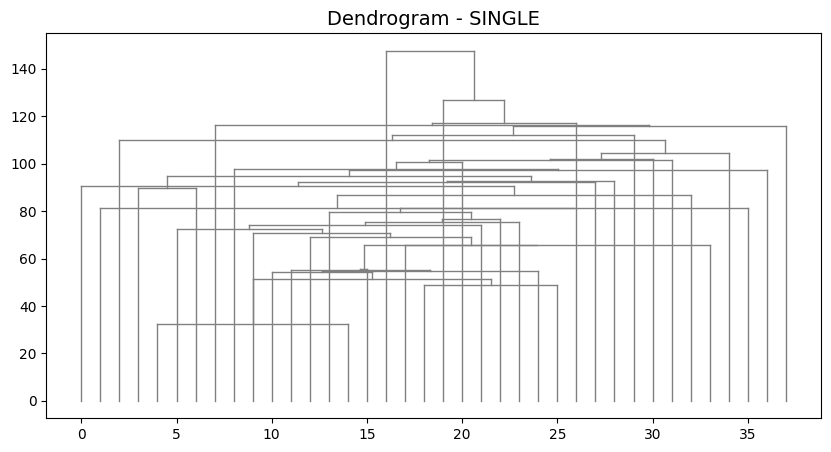


 TRAINING (Linkage: AVERAGE)
   Iter 20: Còn 18 cụm...
   -> Đã đạt mốc 2 cụm. Lưu trạng thái model...
   => AVERAGE:
      - Internal (Train): Silhouette = 0.2811
      - External (Test):  NMI        = 0.0000


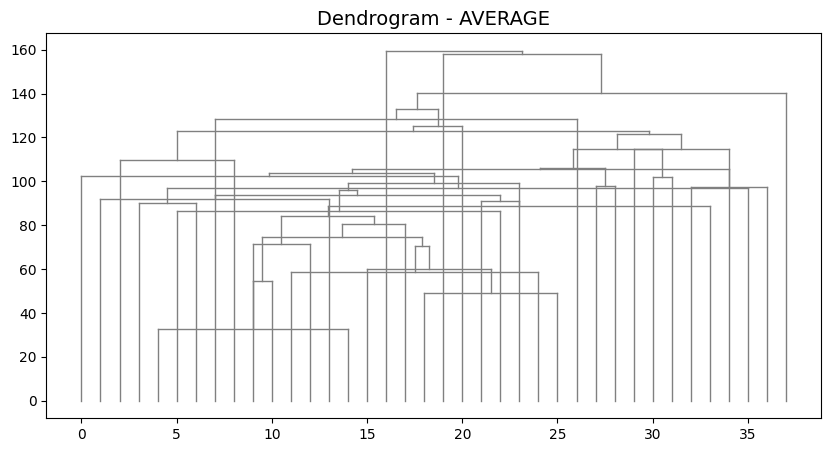


 TRAINING (Linkage: COMPLETE)
   Iter 20: Còn 18 cụm...
   -> Đã đạt mốc 2 cụm. Lưu trạng thái model...
   => COMPLETE:
      - Internal (Train): Silhouette = 0.2846
      - External (Test):  NMI        = 0.0000


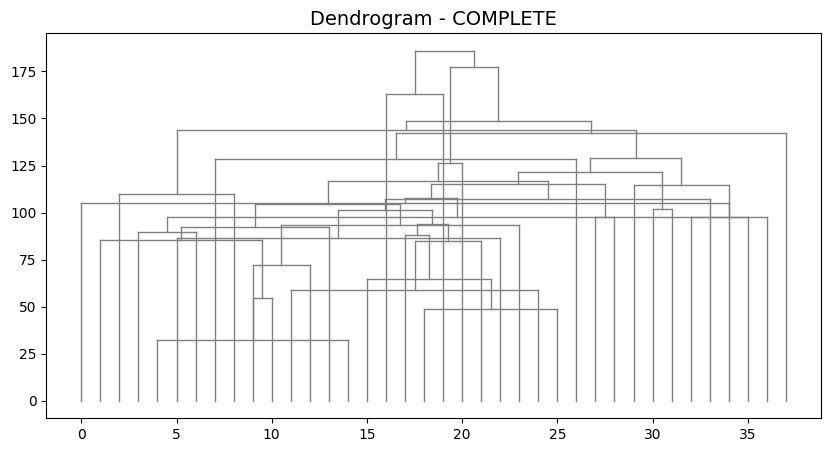


 TRAINING (Linkage: WARD)
   Iter 20: Còn 18 cụm...
   -> Đã đạt mốc 2 cụm. Lưu trạng thái model...
   => WARD:
      - Internal (Train): Silhouette = 0.0977
      - External (Test):  NMI        = 0.2079


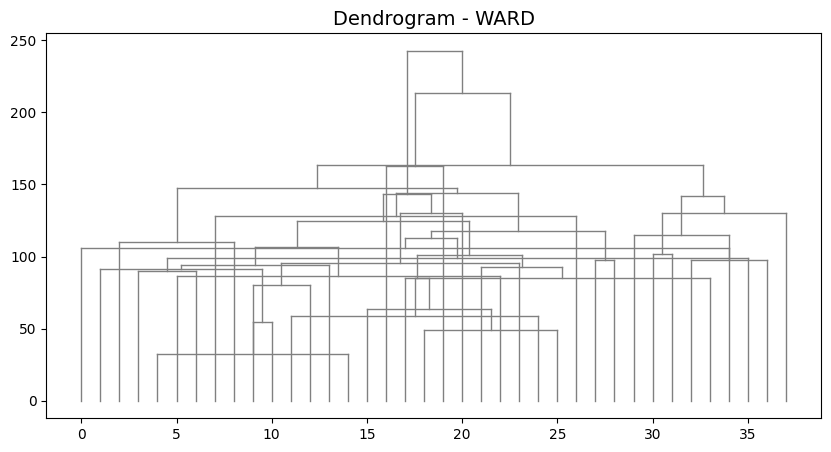


 TỔNG HỢP KẾT QUẢ
          Train_Silhouette (Internal)  Test_NMI (External)
single                       0.281052             0.000000
average                      0.281052             0.000000
complete                     0.284613             0.000000
ward                         0.097708             0.207863


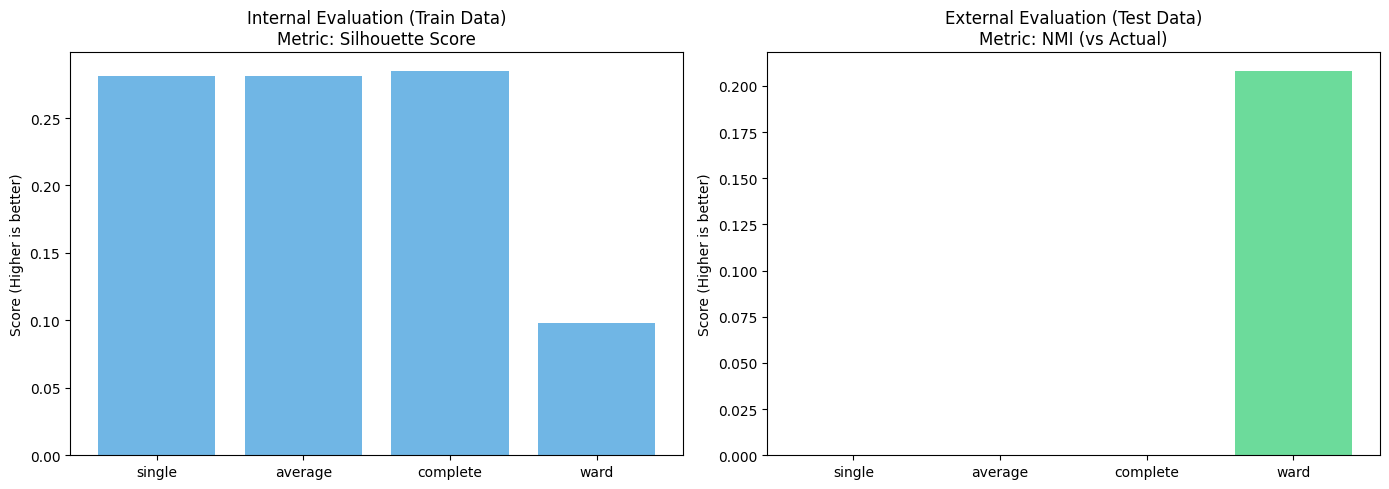


 KHUYẾN NGHỊ: Dựa trên đánh giá thực tế (External NMI),
   phương pháp 'WARD' là mô hình hiệu quả nhất.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, normalized_mutual_info_score
import os

# ============================================================
# PHẦN 1: CLASS HIERARCHICAL CLUSTERING
# ============================================================

class HierarchicalClustering:
    def __init__(self, n_clusters=2, linkage='ward'):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.labels_ = None
        self.centroids_ = None
        self.merge_history_ = []
        self.cluster_coords_ = {}

    def _euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def _compute_distance_matrix(self, X):
        n = X.shape[0]
        dist_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(i+1, n):
                dist = self._euclidean_distance(X[i], X[j])
                dist_matrix[i, j] = dist
                dist_matrix[j, i] = dist
        return dist_matrix

    # --- LINKAGE METHODS ---
    def _single_linkage(self, c1_idxs, c2_idxs, dist_matrix):
        min_dist = float('inf')
        for i in c1_idxs:
            for j in c2_idxs:
                if dist_matrix[i, j] < min_dist: min_dist = dist_matrix[i, j]
        return min_dist

    def _complete_linkage(self, c1_idxs, c2_idxs, dist_matrix):
        max_dist = 0
        for i in c1_idxs:
            for j in c2_idxs:
                if dist_matrix[i, j] > max_dist: max_dist = dist_matrix[i, j]
        return max_dist

    def _average_linkage(self, c1_idxs, c2_idxs, dist_matrix):
        total_dist = 0
        count = 0
        for i in c1_idxs:
            for j in c2_idxs:
                total_dist += dist_matrix[i, j]
                count += 1
        return total_dist / count if count > 0 else 0

    def _ward_linkage(self, c1_idxs, c2_idxs, X):
        m1 = np.mean(X[c1_idxs], axis=0)
        m2 = np.mean(X[c2_idxs], axis=0)
        n1, n2 = len(c1_idxs), len(c2_idxs)
        dist = np.sqrt((2 * n1 * n2) / (n1 + n2)) * self._euclidean_distance(m1, m2)
        return dist

    def _cluster_distance(self, c1_idxs, c2_idxs, dist_matrix, X):
        if self.linkage == 'single': return self._single_linkage(c1_idxs, c2_idxs, dist_matrix)
        elif self.linkage == 'complete': return self._complete_linkage(c1_idxs, c2_idxs, dist_matrix)
        elif self.linkage == 'average': return self._average_linkage(c1_idxs, c2_idxs, dist_matrix)
        elif self.linkage == 'ward': return self._ward_linkage(c1_idxs, c2_idxs, X)
        else: raise ValueError("Linkage không hợp lệ!")

    def fit(self, X):
        print(f"\n TRAINING (Linkage: {self.linkage.upper()})")
        n_samples = X.shape[0]
        self.merge_history_ = []
        clusters = {i: [i] for i in range(n_samples)}

        dist_matrix = None
        if self.linkage != 'ward':
            dist_matrix = self._compute_distance_matrix(X)

        self.cluster_coords_ = {i: (float(i), 0.0) for i in range(n_samples)}
        iteration = 0
        current_id = n_samples

        while len(clusters) > 1:
            iteration += 1
            min_dist = float('inf')
            merge_pair = None
            ids = list(clusters.keys())

            for i in range(len(ids)):
                for j in range(i+1, len(ids)):
                    id1, id2 = ids[i], ids[j]
                    dist = self._cluster_distance(clusters[id1], clusters[id2], dist_matrix, X)
                    if dist < min_dist:
                        min_dist = dist
                        merge_pair = (id1, id2)

            c1, c2 = merge_pair
            x1, y1 = self.cluster_coords_[c1]
            x2, y2 = self.cluster_coords_[c2]
            self.cluster_coords_[current_id] = ((x1+x2)/2.0, min_dist)

            clusters[current_id] = clusters[c1] + clusters[c2]
            del clusters[c1]; del clusters[c2]
            self.merge_history_.append((c1, c2, current_id, min_dist))

            if len(clusters) == self.n_clusters:
                print(f"   -> Đã đạt mốc {self.n_clusters} cụm. Lưu trạng thái model...")
                self.labels_ = np.zeros(n_samples, dtype=int)
                self.centroids_ = []
                for idx, (cid, members) in enumerate(clusters.items()):
                    self.labels_[members] = idx
                    self.centroids_.append(np.mean(X[members], axis=0))
                self.centroids_ = np.array(self.centroids_)

            current_id += 1
            if iteration % 20 == 0: print(f"   Iter {iteration}: Còn {len(clusters)} cụm...")

        return self

    def predict(self, X_new):
        if self.centroids_ is None: return np.zeros(len(X_new))
        preds = []
        for p in X_new:
            dists = [self._euclidean_distance(p, c) for c in self.centroids_]
            preds.append(np.argmin(dists))
        return np.array(preds)

    def plot_dendrogram(self):
        plt.figure(figsize=(10, 5))
        for c1, c2, new_id, dist in self.merge_history_:
            x1, y1 = self.cluster_coords_[c1]
            x2, y2 = self.cluster_coords_[c2]
            plt.plot([x1, x1], [y1, dist], c='gray', lw=1)
            plt.plot([x2, x2], [y2, dist], c='gray', lw=1)
            plt.plot([x1, x2], [dist, dist], c='gray', lw=1)
        plt.title(f"Dendrogram - {self.linkage.upper()}", fontsize=14)
        plt.show()

# ============================================================
# PHẦN 2: MAIN - QUY TRÌNH ĐÁNH GIÁ CHUẨN (INTERNAL TRAIN -> EXTERNAL TEST)
# ============================================================

if __name__ == "__main__":
    try:
        train_df = pd.read_csv(os.path.join(BASE_PATH, 'train_scaled.csv'))
        test_df = pd.read_csv(os.path.join(BASE_PATH, 'test_scaled.csv'))
        actual_df = pd.read_csv(os.path.join(BASE_PATH, 'actual.csv'))
        print(" Đã tải dữ liệu thành công.")
    except Exception as e:
        print(f" Lỗi tải file: {e}"); exit()

    # Chuẩn bị dữ liệu
    X_train = train_df.drop('Sample_ID', axis=1, errors='ignore').values

    if 'Sample_ID' in test_df.columns:
        test_df['Sample_ID'] = pd.to_numeric(test_df['Sample_ID'], errors='coerce')
    test_merged = pd.merge(test_df, actual_df, left_on='Sample_ID', right_on='patient', how='inner')

    if test_merged.empty: print(" Lỗi ID!"); exit()

    X_test = test_merged[[c for c in test_df.columns if c != 'Sample_ID']].values
    y_test_true = test_merged['cancer'].values

    X_train_demo = X_train[:300]

    # 2. CHẠY THỬ NGHIỆM
    linkages = ['single', 'average', 'complete', 'ward']
    results = {}

    print(" BẢNG ĐÁNH GIÁ (INTERNAL ON TRAIN | EXTERNAL ON TEST)")

    for link in linkages:
        # A. HUẤN LUYỆN (TRAINING)
        model = HierarchicalClustering(n_clusters=2, linkage=link)
        model.fit(X_train_demo)

        if model.centroids_ is not None:
            # B. ĐÁNH GIÁ NỘI BỘ (CHỈ TRÊN TẬP TRAIN)
            # Dùng để đánh giá cấu trúc cụm mà mô hình học được
            sil_train = silhouette_score(X_train_demo, model.labels_)
            db_train = davies_bouldin_score(X_train_demo, model.labels_)

            # C. ĐÁNH GIÁ BÊN NGOÀI (CHỈ TRÊN TẬP TEST)
            # Dùng model đã học để predict test, rồi so với actual
            y_pred_test = model.predict(X_test)
            nmi_test = normalized_mutual_info_score(y_test_true, y_pred_test)

            # Lưu kết quả tách biệt
            results[link] = {
                'Train_Silhouette (Internal)': sil_train,
                'Test_NMI (External)': nmi_test
            }

            print(f"   => {link.upper()}:")
            print(f"      - Internal (Train): Silhouette = {sil_train:.4f}")
            print(f"      - External (Test):  NMI        = {nmi_test:.4f}")

            model.plot_dendrogram()
        else:
            print(f"   => {link.upper()}: Lỗi.")

    # 3. TỔNG HỢP & TRỰC QUAN HÓA
    print("\n TỔNG HỢP KẾT QUẢ")
    res_df = pd.DataFrame(results).T
    print(res_df)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Biểu đồ Internal (Train)
    axes[0].bar(res_df.index, res_df['Train_Silhouette (Internal)'], color='#3498db', alpha=0.7)
    axes[0].set_title('Internal Evaluation (Train Data)\nMetric: Silhouette Score')
    axes[0].set_ylabel('Score (Higher is better)')

    # Biểu đồ External (Test)
    axes[1].bar(res_df.index, res_df['Test_NMI (External)'], color='#2ecc71', alpha=0.7)
    axes[1].set_title('External Evaluation (Test Data)\nMetric: NMI (vs Actual)')
    axes[1].set_ylabel('Score (Higher is better)')

    plt.tight_layout()
    plt.show()

    # 4. KHUYẾN NGHỊ
    # Ưu tiên chọn theo External (NMI) vì đây là bài toán có nhãn thực tế để kiểm chứng
    best_link = res_df['Test_NMI (External)'].idxmax()
    print(f"\n KHUYẾN NGHỊ: Dựa trên đánh giá thực tế (External NMI),")
    print(f"   phương pháp '{best_link.upper()}' là mô hình hiệu quả nhất.")

# BASE MODELS - GMM

# ENSEMBLE CLUSTERING

#  TEST ON INDEPENDENT

#  EVALUATION